# 图像阈值

# 1. 图像阈值

① ret, dst = cv2.threshold(src, thresh, maxval, type)

- src： 输入图，只能输入单通道图像，通常来说为灰度图
- thresh： 阈值
- dst： 输出图
- ret： 阈值
- maxval： 当像素值超过了阈值 ( 或者小于阈值，根据 type 来决定 )，所赋予的值
- type：二值化操作的类型，包含以下5种类型： 
- cv2.THRESH_BINARY           超过阈值部分取maxval ( 最大值 )，否则取0
- cv2.THRESH_BINARY_INV    THRESH_BINARY的反转
- cv2.THRESH_TRUNC            大于阈值部分设为阈值，否则不变
- cv2.THRESH_TOZERO          大于阈值部分不改变，否则设为0
- cv2.THRESH_TOZERO_INV  THRESH_TOZERO的反转

# OpenCV 图像阈值处理 (Image Thresholding) 详解

## 核心概念
图像阈值处理是图像分割中最基础的方法。它的原理非常简单：选定一个阈值（Threshold），然后将图像中的所有像素点与这个阈值进行比较，根据比较结果将像素值修改为特定的值（通常是 0 或 255）。

这通常用于将灰度图像转化为**二值图像**（只有黑和白），以便于后续的轮廓提取或物体识别。

---

## 1. 核心函数

OpenCV 提供了一个主要函数来执行此操作：

```python
ret, dst = cv2.threshold(src, thresh, maxval, type)

# OpenCV 阈值处理：参数与返回值详解

本文档详细解析了 `cv2.threshold` 函数的输入参数与输出结果。

## 1. 输入参数详解 (Parameters)

该函数通常接收 4 个参数：

### `src` (Source)
* **含义**：输入图像。
* **注意**：只能输入 **单通道图像**。通常在进行阈值操作前，需要先将彩色图像（BGR）转换为灰度图（Grayscale）。

### `thresh` (Threshold)
* **含义**：设定的阈值。
* **作用**：这是一个分类的基准线。
* **示例**：通常设为 `127`（0-255 的中间值）。

### `maxval` (Maximum Value)
* **含义**：最大值。
* **作用**：当像素值满足特定条件（例如超过阈值）时，我们希望赋予它的新值。
* **示例**：通常设为 `255`（即显示为纯白）。

### `type` (Threshold Type)
* **含义**：阈值操作的类型。
* **作用**：决定了“怎么切”以及“切完之后怎么变”。
* **常见类型**：
    1.  `cv2.THRESH_BINARY`
    2.  `cv2.THRESH_BINARY_INV`
    3.  `cv2.THRESH_TRUNC`
    4.  `cv2.THRESH_TOZERO`
    5.  `cv2.THRESH_TOZERO_INV`

---

## 2. 返回值详解 (Returns)

函数执行后会返回两个值：

### `ret`
* **含义**：返回实际使用的阈值。
* **说明**：
    * 在**简单阈值处理**中，它就等于你输入的 `thresh`。
    * 在**高级算法**（如 **Otsu 二值化** `cv2.THRESH_OTSU` 或 **三角算法** `cv2.THRESH_TRIANGLE`）中，它会返回算法自动计算出的最佳阈值。

### `dst` (Destination)
* **含义**：输出图像。
* **说明**：经过阈值处理后的结果图，尺寸和类型与输入图像 `src` 相同。

In [7]:
import cv2 #opencv的缩写为cv2
import matplotlib.pyplot as plt # matplotlib库用于绘图展示
import numpy as np   # numpy数值计算工具包


127.0
127.0
127.0
127.0
127.0


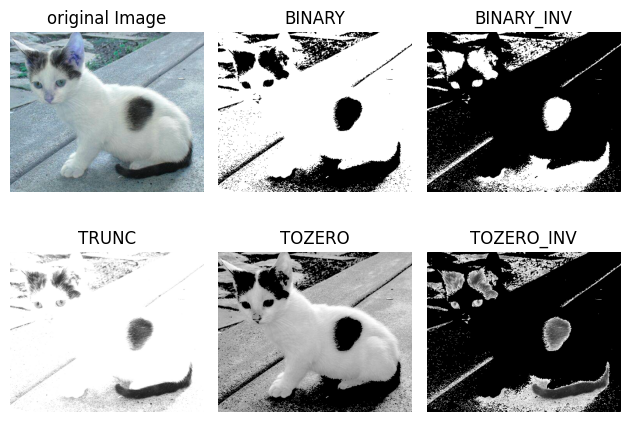

In [15]:
import cv2
import matplotlib.pyplot as plt

# --- 定义辅助显示函数 ---
def showimg(img, title):
    # 语法: cv2.imshow(窗口名, 图像矩阵)
    # 作用: 创建一个 GUI 窗口显示图像。
    # 维度: 此时图像仅在内存中被读取，显示操作不改变图像本身的维度。
    cv2.imshow(title, img)
    
    # 语法: cv2.waitKey(等待时间ms)
    # 作用: 暂停程序，0 表示无限等待直到按下任意键。如果不加这句，窗口会瞬间闪退。
    cv2.waitKey(0)
    
    # 语法: cv2.destroyAllWindows()
    # 作用: 关闭所有由 OpenCV 创建的窗口，释放内存资源。
    cv2.destroyAllWindows()

# --- 读取原始图像 ---
# 语法: cv2.imread(文件路径, 读取标志位)
# 参数: cv2.IMREAD_COLOR 表示强制读取为彩色图（BGR模式）。
# 作用: 将图片文件加载到内存。
# 维度变化: 假设原图是 500x300，此时 img 维度为 (300, 500, 3)。它是 3 通道的 BGR 数组。
img = cv2.imread('01_Picture/01_cat.jpg', cv2.IMREAD_COLOR)

# 语法: cv2.imread(文件路径, 读取标志位)
# 参数: cv2.IMREAD_GRAYSCALE 表示强制读取为灰度图。
# 作用: 阈值处理通常需要基于【单通道】图像，所以必须转灰度或直接读取为灰度。
# 维度变化: 维度变为 (300, 500)。注意：没有了通道数 3，变成了 2D 矩阵。
img_gray = cv2.imread('01_Picture/01_cat.jpg', cv2.IMREAD_GRAYSCALE)

# --- 1. 二值化 (BINARY) ---
# 参数详解:
#   src: img_gray (维度: HxW, 单通道)
#   thresh: 127 (阈值线)
#   maxval: 255 (最大值)
#   type: cv2.THRESH_BINARY
# 作用: 像素值 > 127 的变为 255，<= 127 的变为 0。最常用的黑白二值化。
# 返回值: ret=127.0 (返回使用的阈值), thresh1=处理后的图像矩阵。
# 维度: thresh1 维度仍为 (H, W)，数据类型通常保持 uint8。
ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY) 
print(ret) # 打印出 127.0

# --- 2. 反向二值化 (BINARY_INV) ---
# 参数: type = cv2.THRESH_BINARY_INV
# 作用: 与 BINARY 相反。像素 > 127 变 0 (黑)，<= 127 变 255 (白)。
# 维度: (H, W) 不变。
ret, thresh2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)      
print(ret)

# --- 3. 截断 (TRUNC) ---
# 参数: type = cv2.THRESH_TRUNC
# 作用: 像素 > 127 的，被“削平”设为 127；<= 127 的保持原样。
# 注意: 这里的 maxval (255) 参数在此模式下不生效，没用到。
# 维度: (H, W) 不变。图像整体会变暗，且没有纯白区域（最大只有127）。
ret, thresh3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)     
print(ret)

# --- 4. 归零 (TOZERO) ---
# 参数: type = cv2.THRESH_TOZERO
# 作用: 像素 > 127 的保持原样；<= 127 的变为 0 (黑)。
# 结果: 亮的区域保留细节，暗的区域全黑。
# 维度: (H, W) 不变。
ret, thresh4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
print(ret)

# --- 5. 反向归零 (TOZERO_INV) ---
# 参数: type = cv2.THRESH_TOZERO_INV
# 作用: 像素 > 127 的变为 0 (黑)；<= 127 的保持原样。
# 结果: 亮的区域变黑，暗的区域保留细节。
# 维度: (H, W) 不变。
ret, thresh5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)
print(ret)

titles = ['original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']        
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]  

fig,ax = plt.subplots(2,3)
i = 0
for  i , (A,img) in enumerate( zip(ax.flatten(),images) ):
    A.imshow(img,cmap = 'gray')
    A.set_title(titles[i])
    A.axis('off')
plt.tight_layout()
plt.show()